In [4]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, r2_score



In [5]:
# Step 2: Load dataset
data = pd.read_csv("/content/california_housing_train.csv")



In [6]:
print(data.head())
print(data.info())
print(data.describe())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------   

In [7]:
X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # single output neuron for regression
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [12]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 55901249536.0000 - mae: 205998.2188 - val_loss: 54493552640.0000 - val_mae: 204061.3125
Epoch 2/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 54773145600.0000 - mae: 204771.6875 - val_loss: 52038225920.0000 - val_mae: 198456.4219
Epoch 3/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 52196937728.0000 - mae: 197564.6875 - val_loss: 46332674048.0000 - val_mae: 184791.4531
Epoch 4/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 44606246912.0000 - mae: 179494.0312 - val_loss: 37970587648.0000 - val_mae: 162820.6406
Epoch 5/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 36933070848.0000 - mae: 158556.3750 - val_loss: 28983605248.0000 - val_mae: 136986.8438
Epoch 6/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 26531325952.0000 - mae: 130081.1094 - val_loss: 21257048064.0000 - val_mae: 112105.8203
Epoch 7/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 20171337728.0000 - mae: 108130.7422 - val_loss: 1608

In [13]:
y_pred = model.predict(X_test_scaled).flatten()

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [14]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [15]:

print("\nModel Evaluation:")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)


Model Evaluation:
Mean Squared Error: 6519945387.973499
Root Mean Squared Error: 80746.1787824879
R² Score: 0.5268149196551193


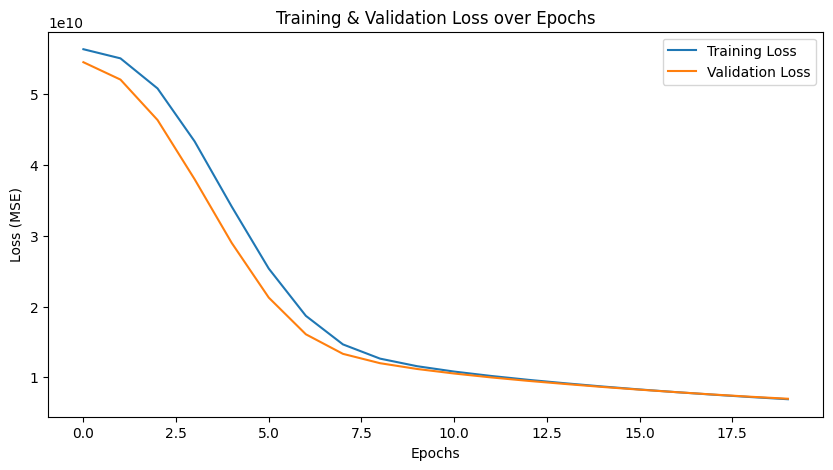

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training & Validation Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()